# Random Walk

<a href="https://colab.research.google.com/github/milocortes/series_tiempo_mide/blob/main/src/mide_st_sesion_01_random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Los modelos baseline sirven como benchmark para comparar modelos más sofisticados. Sin embargo, hay ocasiones donde estos métodos simples o ingenuos producirán los mejores pronósticos. Este el es caso de los procesos que siguen una **caminata aleatoria** (*random walk*).

En esta sección estudiaremos qué es una caminata aleatoria y cómo reconocerla.

A lo largo del camino, veremos los conceptos de 
* Diferenciación, 
* Estacionariedad y
* Ruido blanco (*white noise*),

Dichos conceptos se utilizarán para la construcción de modelos de aprendizaje estadístico más avanzados.


## Datos

Utilizaremos los datos de precio de cierre de las acciones de Alphabet Inc (GOOGL) (Alphabet, Inc. es una empresa tecnológica multinacional con sede en Estados Unidos cuya principal filial es Google, que desarrolla productos y servicios relacionados con internet, software, electrónica de consumo, dispositivos electrónicos y otras tecnologías.)

In [1]:
## Cargamos paquetes
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [2]:
## Cargamos los datos de las acciones de GOOGL
df = pd.read_csv('https://raw.githubusercontent.com/milocortes/series_tiempo_mide/refs/heads/main/datos/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


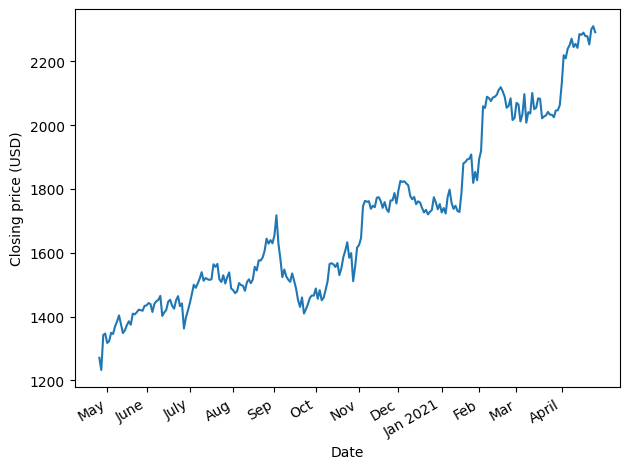

In [3]:
## Graficamos la serie de tiempo
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

El precio de cierre diario de GOOGL se puede modelar utilizando el modelo de paseo aleatorio.

Para modelarlo, primero debemos debemos determinar si el proceso es **estacionario** o no.

Si el proceso es **no estacionario**, tendremos que aplicar una transformación a los datos, tal como una **diferenciación** con el objetivo de hacerla estacionaria.

Posteriormente utilizaremos el gráfico de la **función de autocorrelación** para concluir que el precio de cierre diario de GOOGL puede aproximarse mediante una caminata aleatoria.


## Random Walk

Una caminata aleatoria es un proceso estocástico en el que el ...

Muchas series financieras y económicas presentan este tipo de comportamiento.

Los paseos aleatorios suelen exponer largos períodos en los que se puede observar una tendencia positiva o negativa. También suelen ir acompañados de cambios bruscos de dirección.

En una caminata aleatoria el valor presente de una serie de tiempo $y_t$ es una función del valor en el paso de tiempo anterior $y_{t-1}$, de una constante $C$ y un número aleatorio $\epsilon_t$ también llamado *ruido blanco* (*white noise*). Este término de error sigue una distribución normal con media cero y varianza 1, $\epsilon_t \sim N(0,1)$. 

Una caminata aleatoria sigue la siguiente ecuación:

$$
\begin{equation}
    y_t = C + y_{t-1} + \epsilon
\end{equation}
$$

Si el valor de $C$ es distinto a cero, decimos que el proceso es una caminata aleatoria con deriva.

### Simulación de una caminata aleatoria

Para simplificar la simulación, supongamos que $C=0$, de manera que la ecuación se reduce a 
$$
\begin{equation}
    y_t =  y_{t-1} + \epsilon
\end{equation}
$$

Ahora debemos definir una condición inicial para el momento $t=0$ de la caminata aleatoria. Inicializamos el valor de $y_0 = 0$.

El valor de la caminata aleatoria en $t=1$, $y_1$, será igual al valor previo $y_0$ más el ruido blanco $\epsilon_1$:

$$
\begin{equation}
    y_1 = y_0 + \epsilon_1 = 0 + \epsilon_1 = \epsilon_1
\end{equation}
$$

El valor de la caminata aleatoria en $t=2$, $y_2$, será igual al valor previo $y_1$ más el ruido blanco $\epsilon_2$:

$$
\begin{equation}
    y_2 = y_1 + \epsilon_1 = \epsilon_1 + \epsilon_2 
\end{equation}
$$

El valor de la caminata aleatoria en $t=3$, $y_3$, será igual al valor previo $y_2$ más el ruido blanco $\epsilon_3$:

$$
\begin{equation}
    y_3 = y_2 + \epsilon_3 = \epsilon_1 + \epsilon_2 + \epsilon_3 
\end{equation}
$$

Donde podemos encontar el patrón de la serie. Al inicializar nuestra caminata aleatoria en 0 y definir que $C=0$, tenemos que el valor al tiempo $t$ es la suma de los ruidos blancos desde $t=1$ hasta $t$, esto es:

$$
\begin{equation}
    y_t = \sum_{t=1}^T \epsilon_t
\end{equation}
$$

esta ecuación establece que en cualquier momento $t$, el valor de nuestra serie temporal simulada será la suma acumulada de una serie de números aleatorios.

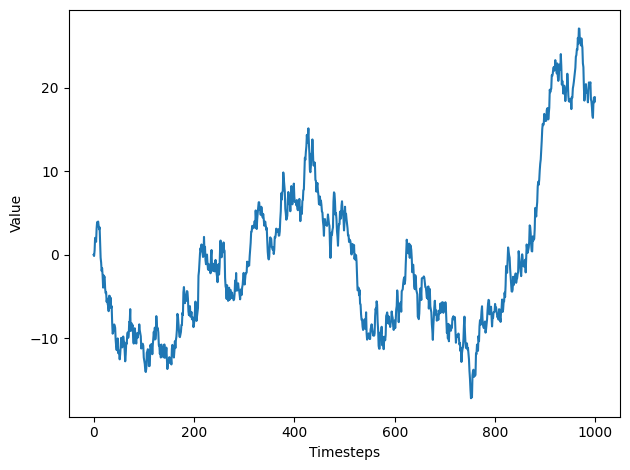

In [4]:
### Simulación de una caminata aleatoria
import numpy as np

np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

### Graficamos la caminata aleatoria
fig, ax = plt.subplots()
ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

Sabemos que se trata de un paseo aleatorio porque lo simulamos. 

Sin embargo, cuando trabajamos con datos de la vida real, necesitamos encontrar una manera de identificar si nuestra serie de tiempo es un paseo aleatorio o no.


## Identificación de una caminata aletoria

Para determinar si nuestra serie de tiempo puede aproximarse como un paseo aleatorio o no, primero debemos definir un paseo aleatorio.

En el contexto de las series de tiempo, una **caminata aleatoria** se define como una serie cuya primera diferencia es estacionaria y no está correlacionada. Esto significa que el proceso se mueve de forma completamente aleatoria. 

Marco Peixeiro propone el siguiente diagrama de los pasos para identificar una **caminata aleatoria**:

![Tomado de *Time Series Forecasting in Python*](images/3_4.png)



### Estacionariedad


Una **serie de tiempo estacionaria** es aquella cuyas propiedades estadísticas no cambian con el tiempo. 

En otras palabras, tiene una media, una varianza y una autocorrelación constantes, y estas propiedades son independientes del tiempo.

Muchos modelos de pronóstico asumen estacionariedad. El modelo de media móvil (MA), el modelo autorregresivo (AR) y el modelo de media móvil autorregresiva (ARMA) suponen estacionariedad. 

Estos modelos sólo se pueden utilizar si verificamos que los datos son efectivamente estacionarios. De lo contrario, los modelos no serán válidos y los pronósticos no serán confiables.

Intuitivamente, esto tiene sentido, porque si los datos no son estacionarios, sus propiedades cambiarán con el tiempo, lo que significaría que los parámetros de nuestro modelo también deben cambiar con el tiempo. 

Esto significa que no es posible derivar una función de los valores futuros como una función de los valores pasados, ya que los *coeficientes cambian en cada momento*, lo que hace que los pronósticos no sean confiables.


Podemos ver la estacionariedad como una suposición que puede hacernos la vida más fácil a la hora de realizar pronósticos. 

Pero, por supuesto, **rara vez veremos una serie temporal estacionaria en su estado original porque a menudo estamos interesados en pronosticar procesos con una tendencia o con ciclos estacionales**.


Por el momento, nos concentraremos en series estacionarias, lo que significa que necesitamos encontrar mecanismos para transformar las series temporales para hacerlas estacionarias.

Una **transformación** es simplemente una manipulación matemática de los datos que estabiliza su media y varianza, volviéndolos así estacionarios.



#### Diferenciación

La transformación más simple que se puede aplicar es la **diferenciación**. 

Esta transformación ayuda a estabilizar la media, lo que a su vez elimina o reduce los efectos de tendencia y estacionalidad. 

La diferenciación implica calcular la serie de cambios de un paso de tiempo a otro. Para lograr eso, simplemente restamos el valor del paso de tiempo anterior $y_{t-1}$ del valor en el presente $y_t$ para obtener el valor diferenciado $y_t'$.

$$
\begin{equation}
    y_t' = y_t - y_{t-1}
\end{equation}
$$

Es posible diferenciar una serie temporal muchas veces. Tomar la diferencia una vez es aplicar una diferenciación de **primer orden**. Tomarlo por segunda vez sería una diferenciación de **segundo orden**. A menudo no es necesario diferenciar más de dos veces para obtener una serie estacionaria.


Si bien la diferenciación se utiliza para obtener una media constante a lo largo del tiempo, también debemos asegurarnos de tener una varianza constante para que nuestro proceso sea estacionario. Las transformaciones logarítimicas se utilizan para ayudar a estabilizar la varianza.

### Prueba de estacionariedad

Una vez que se aplica una transformación a una serie de tiempo, debemos probar la estacionariedad para determinar si necesitamos aplicar otra transformación para hacer que la serie de tiempo sea estacionaria, o si es suficiente. 

Una prueba común es la prueba Dickey Fuller aumentada (ADF).

La prueba ADF verifica la siguiente hipótesis nula: existe raíz unitaria en la una serie de tiempo. La hipótesis alternativa es que no existe raíz unitaria y, por tanto, la serie temporal es estacionaria. 

$$
\begin{equation}
\begin{split}
    H_0 = \text{existe raíz unitaria en la una serie de tiempo} \\
 &     H_a = \text{no existe raíz unitaria en la una serie de tiempo, de manera que la serie es estacionaria}

\end{split}

\end{equation}
$$

$$
\begin{equation}
\end{equation}
$$
El resultado de esta prueba es la estadística ADF, que es un número negativo. Cuanto más negativa sea, más fuerte será el rechazo de la hipótesis nula. 

En su implementación en Python, también se devuelve el p-value. Si su valor es menor que 0,05, también podemos rechazar la hipótesis nula y decir que la serie es estacionaria.

Consideremos una serie de tiempo donde el valor presente $y_t$ solo depende de su valor pasado $y_{t-1}$ sujeto a un coeficiente $\alpha_1$, una constante $C$, y un ruido blanco $\epsilon_t$:

$$
\begin{equation}
    y_t = C + \alpha_1 y_{t-1} + \epsilon_t
\end{equation}
$$

Aquí $\alpha_1$ es la raíz de la serie de tiempo. Esta serie será estacionaria sólo si la raíz cae dentro del círculo unitario. De manera que su valor debe estar entre -1 y 1. De otra forma, la serie será no estacionaria. La presencia de una raíz unitaria hace que la media de la serie dependa del tiempo, por lo que la serie no sería estacionaria.

Una vez que tenemos una serie estacionaria, debemos determinar si existe autocorrelación o no. 

Recordemos que un paseo aleatorio es una serie cuya primera diferencia es estacionaria y no está correlacionada. 

La prueba ADF se encarga de la parte de estacionariedad, pero necesitaremos usar la función de autocorrelación para determinar si la serie está correlacionada o no.



### Función de Autocorrelación

Una vez que un proceso está estacionario, usaremos la función de autocorrelación (*autocorrelation function*-ACF) para determinar si estamos analizando un paseo aleatorio o no.

Sabemos que la correlación mide la relación lineal entre dos variables. La autocorrelación mide la relación lineal entre valores rezagados de una serie de tiempo. Es decir, mide la correlación de la serie temporal consigo misma. La ACF revela cómo cambia la correlación entre dos valores cualesquiera a medida que aumenta el rezago. Aquí, el rezago es simplemente el número de pasos de tiempo que separan dos valores.

Por ejemplo, podemos calcular el coeficiente de autocorrelación entre $y_t$ e $y_{t–1}$. En este caso, el rezago es igual a 1 y el coeficiente se denotaría como $r_1$. De manera similar, podemos calcular la autocorrelación entre $y_t$ y $y_{t-2}$. Entonces el rezago sería 2 y el coeficiente se denotaría como $r_2$. 

Cuando trazamos la función ACF, el coeficiente es la variable dependiente, mientras que el rezago es la variable independiente. 

El coeficiente de autocorrelación en el retraso 0 siempre será igual a 1. Esto tiene sentido intuitivamente, porque la relación lineal entre una variable y ella misma en el mismo paso de tiempo debe ser perfecta y, por lo tanto, igual a 1.

En presencia de una tendencia, un gráfico del ACF mostrará que los coeficientes son altos para rezagos cortos y disminuirán linealmente a medida que aumenta el rezago. Si los datos son estacionales, el gráfico ACF también mostrará patrones cíclicos. Por lo tanto, trazar la función ACF de un proceso no estacionario no nos dará más información de la que está disponible al observar la evolución de nuestro proceso a través del tiempo. Sin embargo, trazar el ACF para un proceso estacionario puede ayudarnos a identificar la presencia de un paseo aleatorio.


### Prueba ADF para la serie simulada


In [5]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


La estadística ADF es de –0.97 y su p-value de 0.77. El estadístico ADF no es un número negativo grande y con un p-value superior a 0.05, no podemos rechazar la hipótesis nula que afirma que nuestra serie temporal no es estacionaria. 

Podemos respaldar aún más nuestra conclusión trazando la función ACF.

### Función de autocorrelación para la serie simulada


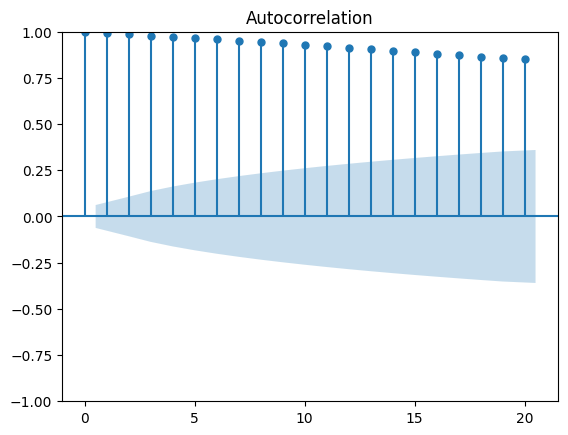

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags=20);

Los coeficientes de autocorrelación disminuyen lentamente a medida que aumenta el rezago, lo cual es un indicador claro que nuestra caminata aleatoria no es un proceso estacionario. 

El área sombreada representa un intervalo de confianza. Si un punto está dentro del área sombreada, entonces no es significativamente diferente de 0. De lo contrario, el coeficiente de autocorrelación es significativo.

Dado que la caminata aleatoria es no estacionaria, debemos aplicar una transformación para hacerla estacionaria y poder recuperar información útil del gráfico de la función de autocorrelación. 

Aplicaremos una diferenciación de primer orden, con lo cual perderemos el primer punto de datos cada vez que hagamos diferencia.


In [7]:
### Usaremos el método diff de numpy para calcular la primer diferencia
diff_random_walk = np.diff(random_walk, n=1)

Graficamos la serie transformada:

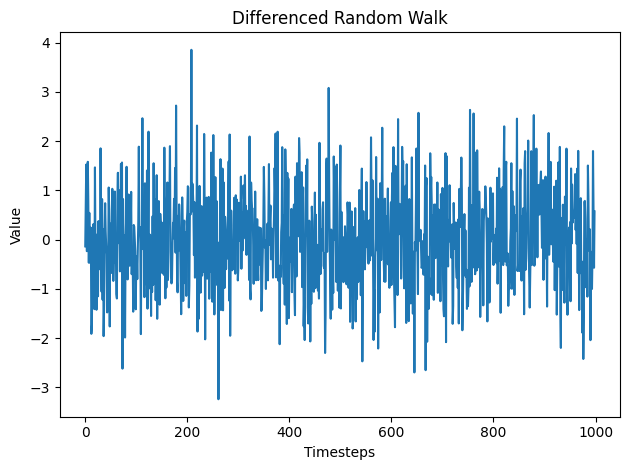

In [8]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()


Como se puede ver, hemos eliminado la tendencia de nuestra serie. Además, la variación parece bastante estable. Probemos nuevamente la estacionariedad usando la prueba ADF:

In [9]:
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


La estadística ADF es -31.79 con un p-value de 0. Esta vez la estadística ADF es un número negativo grande y el p-value es inferior a 0.05. Por lo tanto, rechazamos la hipótesis nula y podemos decir que este proceso no tiene raíz unitaria y, por tanto, es estacionario.


Ahora podemos trazar la función ACF de nuestra nueva serie estacionaria:


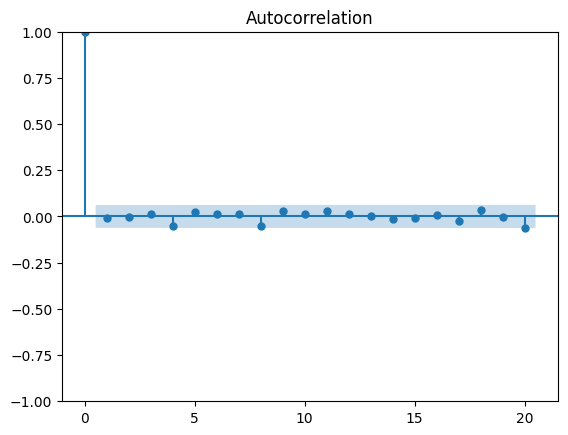

In [10]:
plot_acf(diff_random_walk, lags=20);

Se observa que no hay coeficientes de autocorrelación significativos después del rezago 0. 

Esto significa que el proceso estacionario es completamente aleatorio y, por lo tanto, puede describirse como ruido blanco. 

Cada valor está simplemente a un paso aleatorio del anterior, sin relación entre ellos. 

Hemos demostrado que nuestros datos simulados son una caminata aleatoria: la serie es estacionaria y no está correlacionada después de una diferenciación de primer orden, lo que corresponde a la definición de paseo aleatorio.

## La serie GOOGL es una caminata aleatoria?

Hemos aplicado los pasos necesarios para identificar un paseo aleatorio en nuestros datos simulados, por lo que este es preciso probar lo aprendido en un conjunto de datos de la vida real.

Tomando el precio de cierre de GOOGLE del 27 de abril de 2020 al 27 de abril de 2021 de finance.yahoo.com, determinaremos si el proceso se puede aproximar como una caminata aleatoria o no.


In [11]:
## Cargamos los datos de las acciones de GOOGL
df = pd.read_csv('https://raw.githubusercontent.com/milocortes/series_tiempo_mide/refs/heads/main/datos/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


Visualicemos la serie

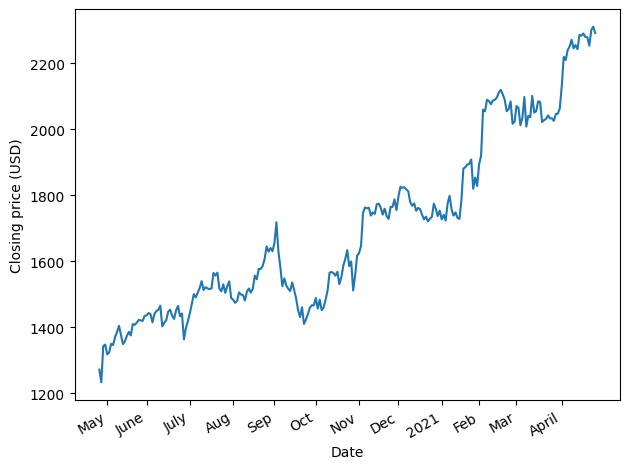

In [12]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
plt.xticks(
[4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb','Mar', 'April']
)
fig.autofmt_xdate()
plt.tight_layout()

Ppodemos ver una tendencia en los datos a medida que el precio de cierre aumenta con el tiempo; por lo tanto, no tenemos un proceso estacionario. Esta intuición la respaldamos con la prueba ADF:

In [13]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771302
p-value: 0.9699419435913057


La prueba ADF calcula un estadistico de 0.16 y un p-value superior a 0.05, por lo que los datos no son estacionarios. Por lo tanto, diferenciaremos nuestros datos para ver si eso los hace estacionarios:

In [14]:
diff_close = np.diff(df['Close'], n=1)

Aplicamos la prueba ADF a los datos diferenciados:

In [15]:
GOOGL_diff_ADF_result = adfuller(diff_close)
print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295234
p-value: 5.3865309614545585e-06


La prueba ADF calcula un estadístico de -5.3 y un p-value menor que 0.05, lo que significa que tenemos un proceso estacionario. 

Ahora podemos trazar la función ACF y ver si existe autocorrelación:

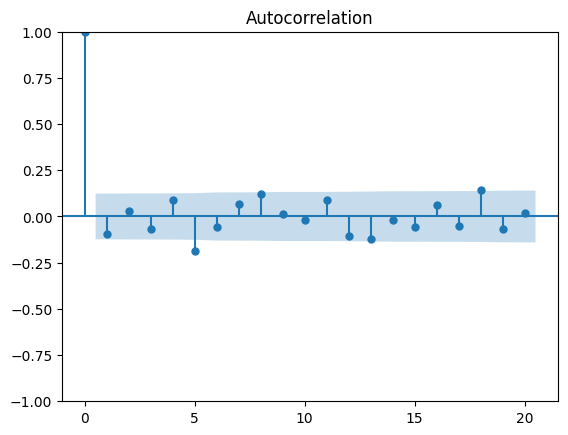

In [16]:
plot_acf(diff_close, lags=20);

Podría hacerte ruido en la cabeza y preguntarte si existe autocorrelación o no. No vemos ningún coeficiente significativo, excepto en los rezagos 5 y 18. Esta situación puede surgir a veces y se debe únicamente al azar. En tal situación, podemos asumir con seguridad que los coeficientes en los rezagos 5 y 18 no son significativos, porque no tenemos coeficientes significativos consecutivos. Simplemente sucedió por casualidad que los valores diferenciados estén ligeramente correlacionados con los de los rezagos 5 y 18.

Por tanto, podemos concluir que el precio de cierre de GOOGL puede aproximarse mediante un proceso de paseo aleatorio. Tomar la primera diferencia hace que la serie sea estacionaria y su gráfico ACF no muestra autocorrelación, lo que significa que es puramente aleatorio.


### REFERENCIAS
* Peixeiro, M. (2022). Time series forecasting in python. 2022. Manning.